In [1]:
import pandas as pd
import numpy as np
import glob
import datetime as dt
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_scws(rid):
    
    scw_stats = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/points/"+rid+"_scw_storms_df.csv")
    non_scw_stats = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/points/"+rid+"_non_scw_storms_df.csv")    
    scw_stats["aspect_ratio"] = scw_stats["major_axis_length"] / scw_stats["minor_axis_length"]
    non_scw_stats["aspect_ratio"] = non_scw_stats["major_axis_length"] / non_scw_stats["minor_axis_length"]    
    scw_stats["rid"] = rid
    non_scw_stats["rid"] = rid
    return scw_stats, non_scw_stats

In [3]:
melb_scw, melb_null = load_scws("2")
bris_scw, bris_null = load_scws("66")
namoi_scw, namoi_null = load_scws("69")
perth_scw, perth_null = load_scws("70")
syd_scw, syd_null = load_scws("71")

df_scw = pd.concat([melb_scw, perth_scw, syd_scw, namoi_scw, bris_scw],axis=0)
df_null = pd.concat([melb_null, perth_null, syd_null, namoi_null, bris_null],axis=0)

maps = {"2":"Melbourne","66":"Brisbane","69":"Namoi","70":"Perth","71":"Sydney"}
df_scw["location"] = df_scw.rid.map(maps)
df_null["location"] = df_null.rid.map(maps)

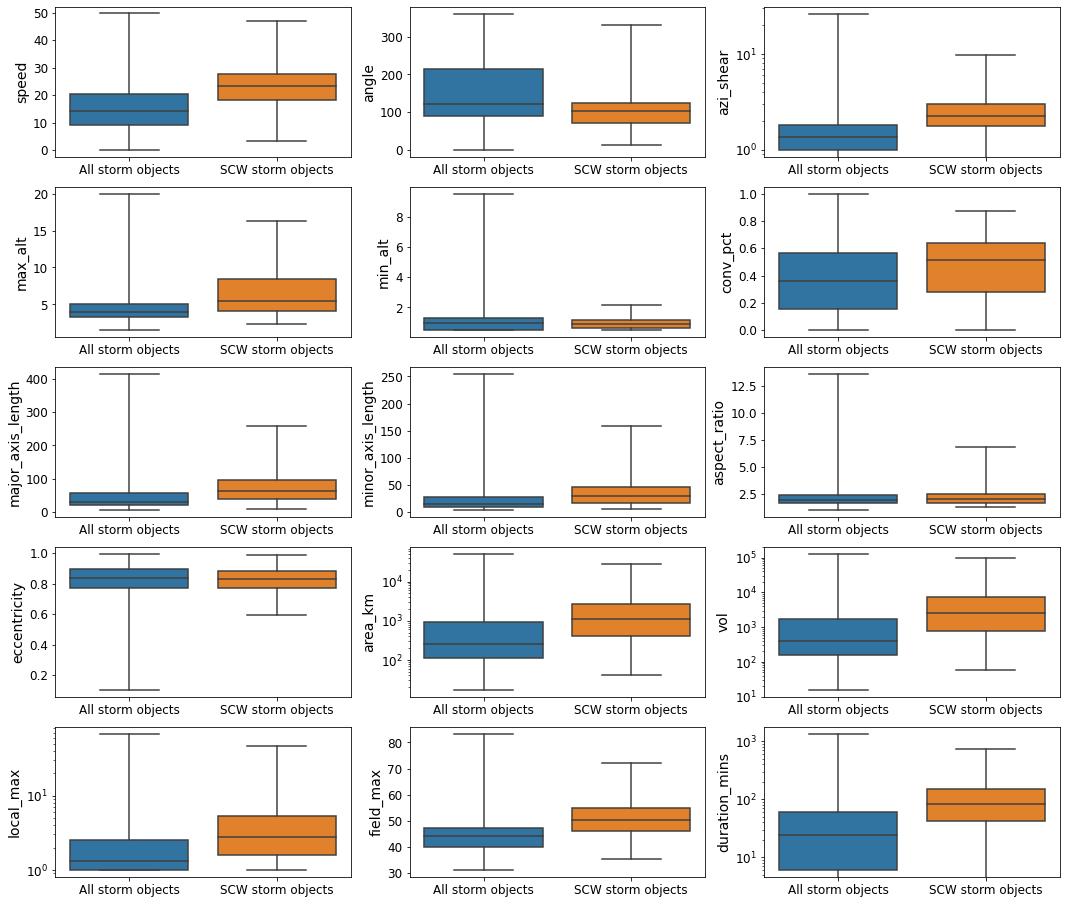

In [4]:
def plot_box(ax,v,scw,non_scw,yscale,y1,y2):
    sns.boxplot(data=[non_scw[v], 
                      scw[v]],whis=100)    

    plt.ylabel(v,size=14)
    plt.xticks([0,1],["All storm objects","SCW storm objects"])
    ax.set_yscale(yscale)
    ax.tick_params(labelsize=12)
    plt.ylim([y1,y2])

    
def plot_box_regional(ax,v,df,yscale,y1,y2):
    sns.boxplot(data=df,x="location",y=v,whis=100)    
    plt.ylabel(v,size=14)
    ax.set_yscale(yscale)
    ax.tick_params(labelsize=12)
    plt.ylim([y1,y2])

var = ["speed","angle","azi_shear","max_alt","min_alt","conv_pct","major_axis_length","minor_axis_length",
       "aspect_ratio","eccentricity","area_km","vol","local_max","field_max","duration_mins"]
log_vars = ["area_km","local_max","vol","duration_mins","azi_shear"]
yscales = dict.fromkeys(var,"linear"); 
for v in log_vars:
    yscales[v]="log" 
y1 = dict.fromkeys(var,None)
y2 = dict.fromkeys(var,None); y2["speed"]=52

plt.figure(figsize=[18,16])
for i in np.arange(len(var)):
    ax=plt.subplot(5,3,i+1)
    if var[i] in ["speed","angle"]:
        plot_box(ax,var[i],df_scw.query("(speed_rnge<4) & (speed<50)"),df_null.query("(speed_rnge<4) & (speed<50)"),yscales[var[i]],y1[var[i]],y2[var[i]])
    else:
        plot_box(ax,var[i],df_scw,df_null,yscales[var[i]],y1[var[i]],y2[var[i]])
        
plt.savefig("/g/data/eg3/ab4502/figs/ExtremeWind/scws_storm_hist.jpeg",dpi=1000,bbox_inches="tight")

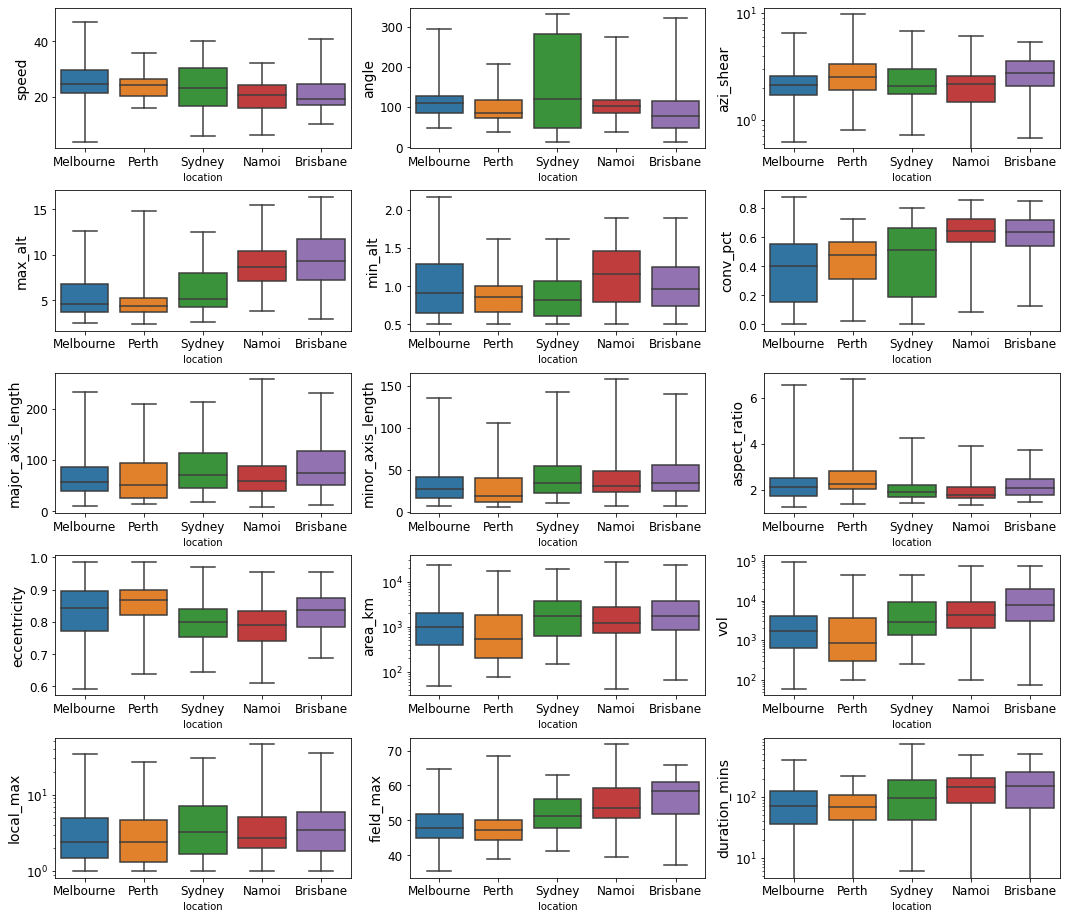

In [5]:
plt.figure(figsize=[18,16])
for i in np.arange(len(var)):
    ax=plt.subplot(5,3,i+1)
    if var[i] in ["speed","angle"]:
        plot_box_regional(ax,var[i],df_scw.query("(speed_rnge<4) & (speed<50)"),yscales[var[i]],y1[var[i]],y2[var[i]])
    else:
        plot_box_regional(ax,var[i],df_scw,yscales[var[i]],y1[var[i]],y2[var[i]])
plt.subplots_adjust(hspace=0.3)
plt.savefig("/g/data/eg3/ab4502/figs/ExtremeWind/scws_storm_hist_regional.jpeg",dpi=1000,bbox_inches="tight")

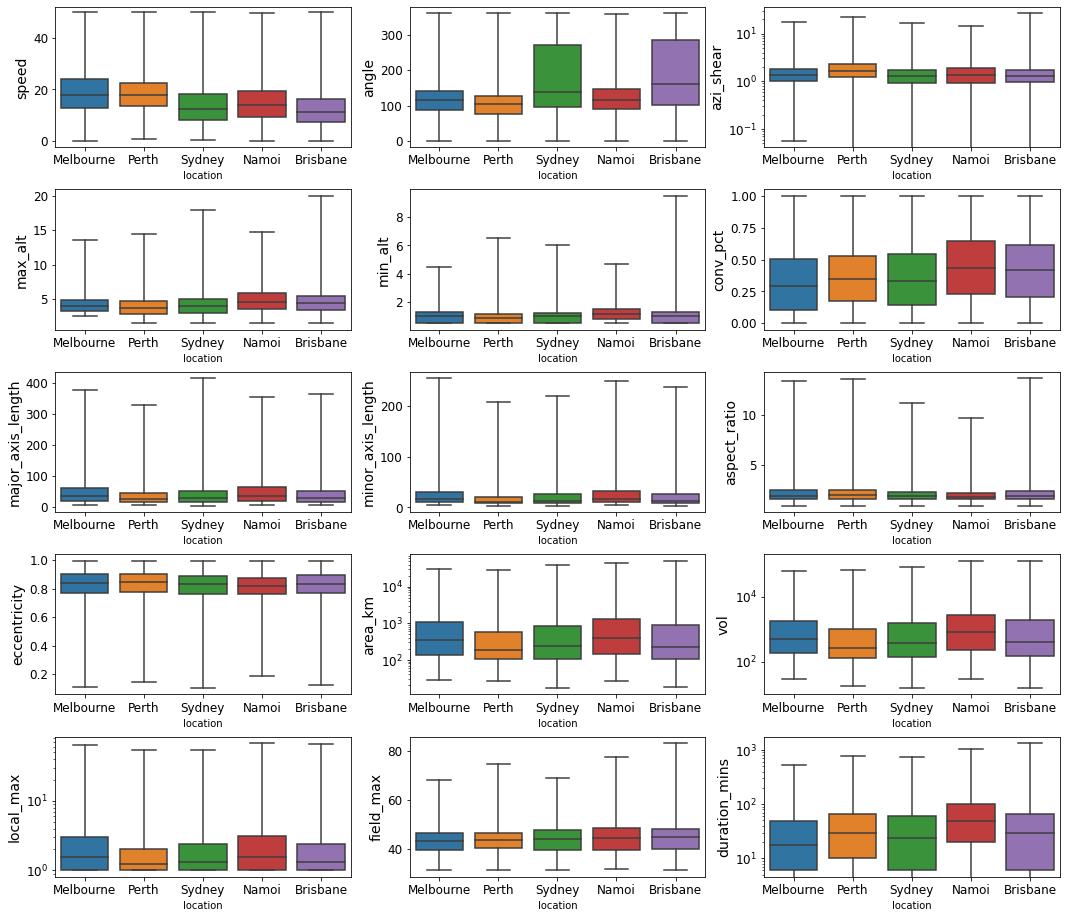

In [6]:
plt.figure(figsize=[18,16])
for i in np.arange(len(var)):
    ax=plt.subplot(5,3,i+1)
    if var[i] in ["speed","angle"]:
        plot_box_regional(ax,var[i],df_null.query("(speed_rnge<4) & (speed<50)"),yscales[var[i]],y1[var[i]],y2[var[i]])
    else:
        plot_box_regional(ax,var[i],df_null,yscales[var[i]],y1[var[i]],y2[var[i]])
plt.subplots_adjust(hspace=0.3)